In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Load the dataset 
df = pd.read_csv('city_day.csv')

# Drop unnecessary columns 
df = df.drop(['City', 'Date', 'AQI_Bucket'], axis=1)

In [3]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [4]:
null_values = df.isnull().sum()
print(null_values)

PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64


In [5]:
len(df)

29531

In [6]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [7]:
len(df.columns)

13

In [8]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [9]:
df_imputed.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581


In [10]:
df_imputed.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [11]:
# Convert AQI values into categories 
bins = [0, 50, 100, 200, 300, 500,float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Beyond AQI']
df_imputed['AQI_Category'] = pd.cut(df_imputed['AQI'], bins=bins, labels=labels, include_lowest=True)

In [12]:
df_imputed.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Category
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Unhealthy for Sensitive Groups
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Unhealthy for Sensitive Groups
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Unhealthy for Sensitive Groups
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Unhealthy for Sensitive Groups
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Unhealthy for Sensitive Groups


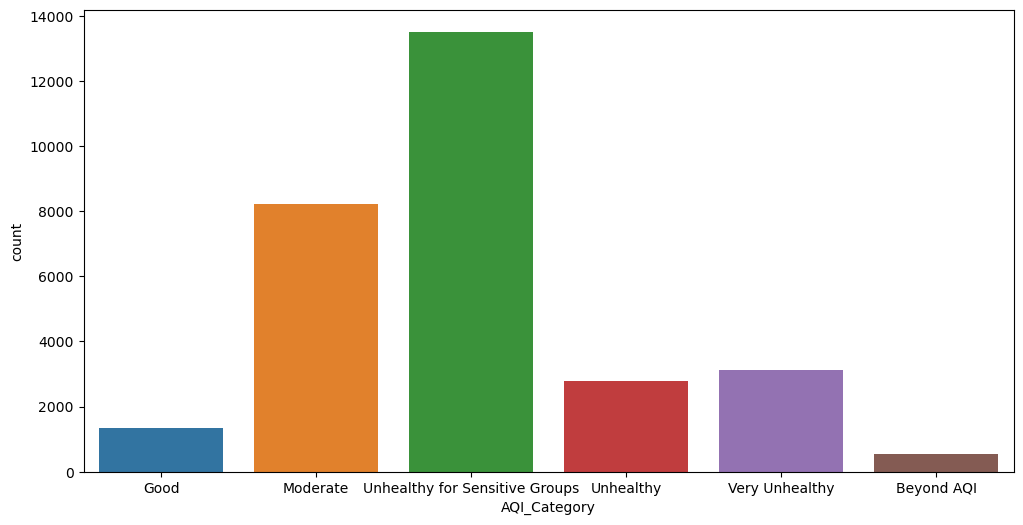

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x = df_imputed['AQI_Category'])
plt.show()

* So the last bar in this plot are the AQI values that are above 500, which is beyond the max AQI value, so we will consider these values as outliers

In [14]:
len(df_imputed[df_imputed["AQI_Category"] == "Beyond AQI"])

543

In [15]:
len(df_imputed)

29531

In [16]:
# removing outliers
final_data  = df_imputed[df_imputed['AQI_Category'] != 'Beyond AQI']


In [17]:
len(final_data)

28988

In [18]:
# Split the data into features (X) and target variable (y)
X = final_data.drop(['AQI', 'AQI_Category'], axis=1)
y = final_data['AQI_Category']

In [19]:
# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
for i,j in zip(y, y_encoded):
    print("Category: ",i," Encoded value: ",j)


Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for

Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Moderate  Encoded value:  1
Categ

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Apply KNN and Train
k = 9 
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [23]:
# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test_scaled)

In [24]:
# Convert predictions back to original categories
y_pred_category = label_encoder.inverse_transform(y_pred_knn)

In [25]:
# Training accuracy
y_train_pred = model_knn.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
formatted_train_accuracy = f'Training Accuracy: {train_accuracy * 100:.2f}%'
print(formatted_train_accuracy)

Training Accuracy: 83.61%


In [26]:
# Testing accuracy
y_test_pred = model_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
formatted_test_accuracy = f'Testing Accuracy: {test_accuracy * 100:.2f}%'
print(formatted_test_accuracy)



Testing Accuracy: 79.87%


<Figure size 800x600 with 0 Axes>

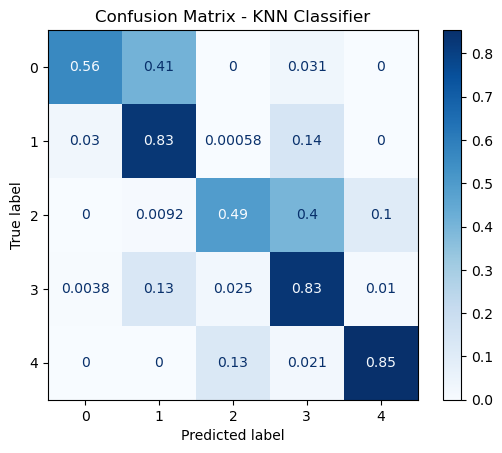

In [45]:
from sklearn.metrics import plot_confusion_matrix

# Define RandomForestClassifier with best hyperparameters
knn_classifier_best = KNeighborsClassifier(n_neighbors=k)
knn_classifier_best.fit(X_train_scaled, y_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(knn_classifier_best, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()


Classification Report on Unseen Data:
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       257
           1       0.77      0.83      0.80      1728
           2       0.63      0.54      0.58       541
           3       0.84      0.84      0.84      2650
           4       0.87      0.84      0.86       622

    accuracy                           0.80      5798
   macro avg       0.76      0.73      0.74      5798
weighted avg       0.80      0.80      0.80      5798



Classification Report on Unseen Data:
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       257
           1       0.77      0.83      0.80      1728
           2       0.63      0.54      0.58       541
           3       0.84      0.84      0.84      2650
           4       0.87      0.84      0.86       622

    accuracy                           0.80      5798
   macro avg       0.76      0.73      0.74      5798
weighted avg       0.80      0.80      0.80      5798



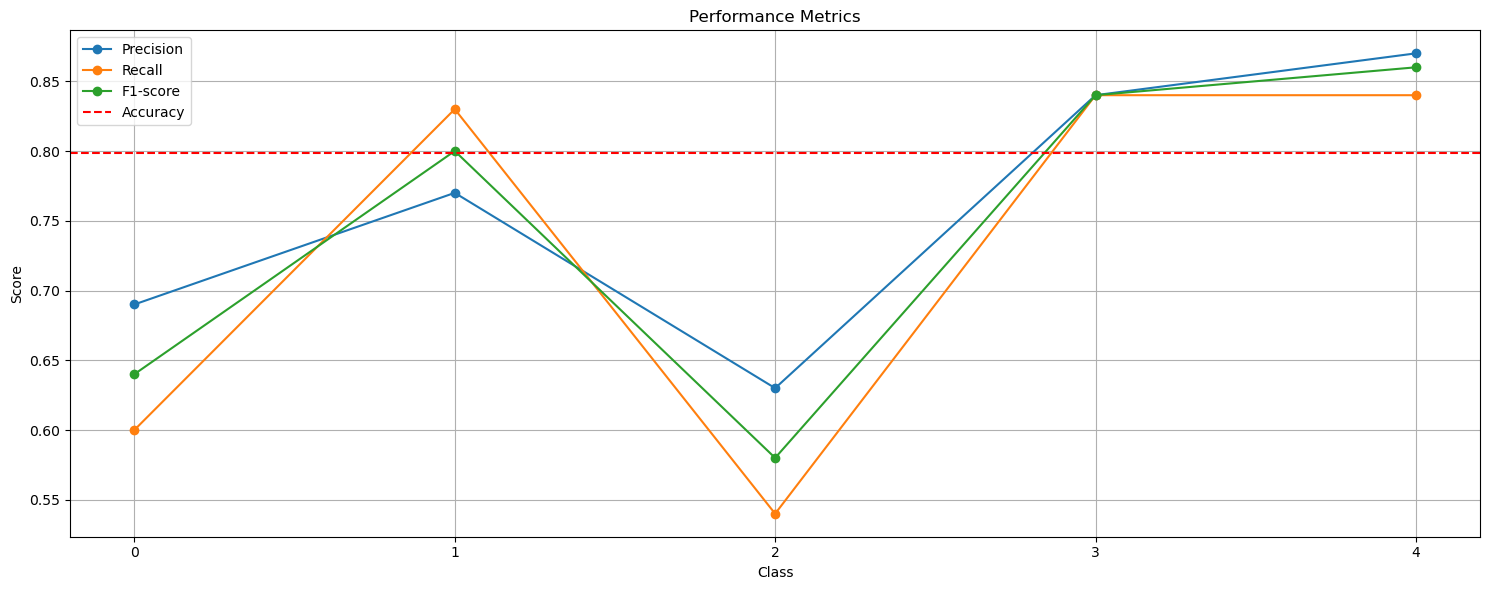

In [48]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have the classification report stored in a variable
class_report_unseen = classification_report(y_test, y_pred_knn)
print("Classification Report on Unseen Data:")
print(class_report_unseen)

# Parse the classification report
report_lines = class_report_unseen.split('\n')[2:-5]  # Exclude header and footer
precision = []
recall = []
f1_score = []
support = []
classes = []

for line in report_lines:
    data = line.split()
    if len(data) == 0:
        continue
    classes.append(data[0])
    precision.append(float(data[1]))
    recall.append(float(data[2]))
    f1_score.append(float(data[3]))
    support.append(int(data[4]))

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Plotting
plt.figure(figsize=(15, 6))

# Plot precision
plt.plot(classes, precision, label='Precision', marker='o')

# Plot recall
plt.plot(classes, recall, label='Recall', marker='o')

# Plot F1-score
plt.plot(classes, f1_score, label='F1-score', marker='o')

# Plot accuracy
plt.axhline(y=accuracy, color='r', linestyle='--', label='Accuracy')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.xticks()
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


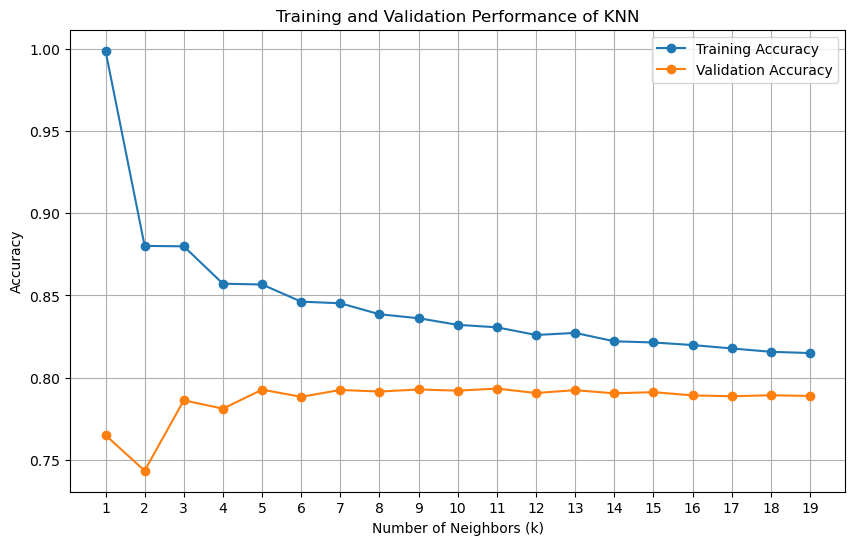

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


# Initialize lists to store training and validation scores
train_scores = []
val_scores = []

# Define a range of k values
k_values = range(1, 20)

# Iterate over different values of k
for k in k_values:
    # Initialize KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation
    cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
    
    # Calculate mean cross-validation score
    mean_cv_score = np.mean(cv_scores)
    
    # Fit the classifier on the entire training set
    knn_classifier.fit(X_train_scaled, y_train)
    
    # Calculate training accuracy
    train_accuracy = knn_classifier.score(X_train_scaled, y_train)
    
    # Append training and validation scores to lists
    train_scores.append(train_accuracy)
    val_scores.append(mean_cv_score)

# Plot training and validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_values, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance of KNN')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

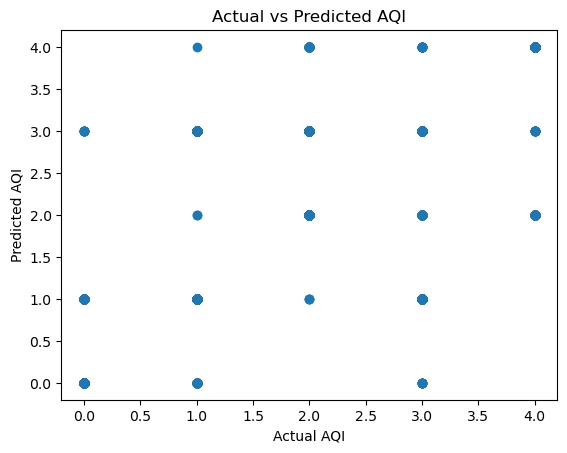

In [30]:

# Visualize Predictions
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()



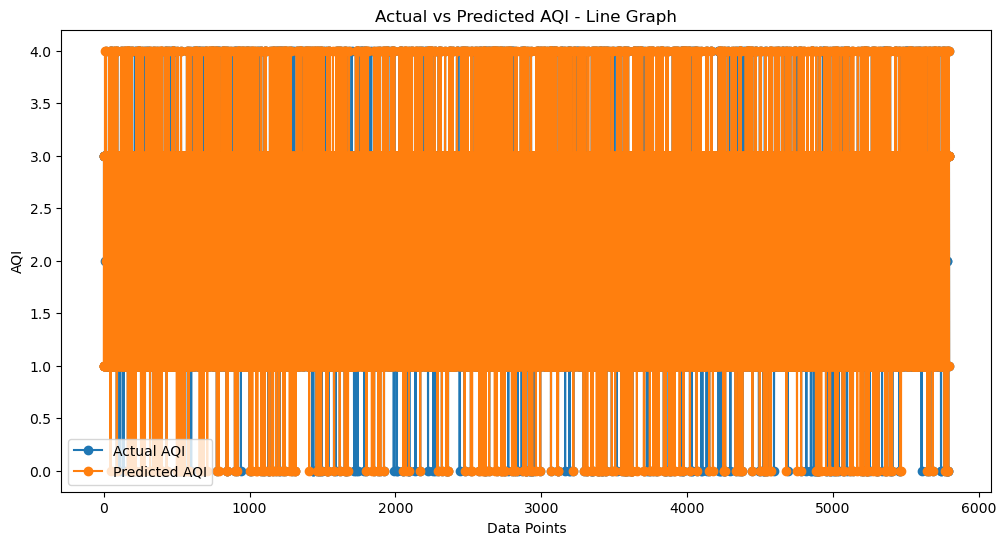

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data for demonstration
x_values = np.arange(len(y_test))  # Use indices as x values
actual_values = np.array(y_test)
predicted_values = np.array(y_pred_knn)

plt.figure(figsize=(12,6))
# Line Graph
plt.plot(x_values, actual_values, label='Actual AQI', marker='o')
plt.plot(x_values, predicted_values, label='Predicted AQI', marker='o')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI - Line Graph')
plt.legend()  # Display legend

# Show the plot
plt.show()


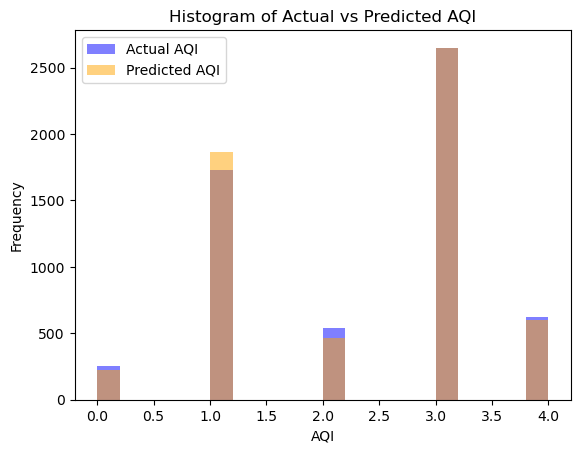

In [32]:
import matplotlib.pyplot as plt

# Generate some example data for demonstration
actual_values = y_test
predicted_values = y_pred_knn

# Plot Histogram
plt.hist(actual_values, bins=20, alpha=0.5, label='Actual AQI', color='blue')
plt.hist(predicted_values, bins=20, alpha=0.5, label='Predicted AQI', color='orange')

# Add labels and title
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted AQI')
plt.legend()  # Display legend

# Show the plot
plt.show()
